# MNIST Digit Classification with a Fully-Connected Neural Network

This notebook presents an MNIST digit classifier built with a fully-connected neural network in TensorFlow and Keras.

Running 10 random subsets on different sized networks to see the "deep double descent" phenomenon

## 1. Import Statements

---



In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
#%tensorflow_version 2.x
import tensorflow as tf

tf.random.set_seed(42)

AttributeError: module 'tensorflow._api.v2.compat.v2.__internal__' has no attribute 'register_load_context_function'

## 2. Data Preprocessing

---



The first step is to preprocess our data. Here, we load the MNIST digit dataset from the Keras datasets library, split it into training and test sets, reshape the matrices, and encode the labels categorically.

In [ ]:
# Load the MNIST dataset.
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

In [ ]:
# Divide the data into features and labels.
train_images, train_labels = train_data
test_images, test_labels = test_data

In [ ]:
# Reshape and normalize the images.
X_train = train_images.reshape((60000, 784))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 784))
X_test = X_test.astype('float32') / 255

In [ ]:
# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

Further, the following are the shapes of each matrix, as well as a visualization of a random MNIST digit.

In [ ]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 784)
Testing Images: (10000, 784)
Training Labels: (60000, 10)
Test Labels: (10000, 10)


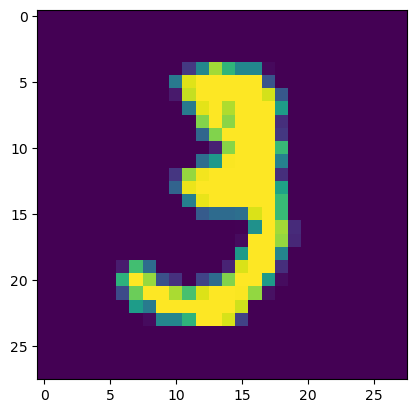

In [ ]:
# Show a sample MNIST digit.
plt.imshow(train_images[10])
plt.show()

## Decrease dataset
To allow interpolation, which typically occurs at `n*K` where n is number of samples and K is number of classes in multicalss classification

In [ ]:
X_val_lst = []
X_train_lst = []
X_test_lst = []
y_val_lst = []
y_train_lst = []
y_test_lst = []

for i in range(10):
    # train sample
    train_idx = np.random.choice(60000, 4000)
    X_train_lst.append(X_train[train_idx,:])
    y_train_lst.append(y_train[train_idx,:])
    # validation sample
    val_idx = np.random.choice(60000, 1000)
    X_val_lst.append(X_train[val_idx,:])
    y_val_lst.append(y_train[val_idx,:])
    # test sample
    test_idx = np.random.choice(10000, 1000)
    X_test_lst.append(X_test[test_idx,:])
    y_test_lst.append(y_test[test_idx,:])
    
# Show the shapes of the data.
print("Training Images:", X_train_lst[0].shape)
print("Testing Images:", X_test_lst[0].shape)
print("Training Labels:", y_train_lst[0].shape)
print("Test Labels:", y_test_lst[0].shape)

Training Images: (4000, 784)
Testing Images: (1000, 784)
Training Labels: (4000, 10)
Test Labels: (1000, 10)


## 3. Neural Network

---



### 3.1. Define the Model

We then have to define our neural network. Here, we define a sequential model with two fully-connected layers.

In [ ]:
# Define the sequential model.
model = tf.keras.models.Sequential()

try different hidden layer sizes, intepolation should occur with 10000 parameter in the net

### First layer 1 to 50

In [ ]:
# Define the parameters.
num_epochs = 1000
batch_size = 256

mean_layer_size_list = np.zeros(50)
mean_train_loss_list = np.zeros(50)
mean_test_loss_list = np.zeros(50)

for i in range(10):
    print(f"********* Dataset Number {i} ***********")
    layer_size_list = []
    train_loss_list = []
    test_loss_list = []
    # Try different hidden layer sizes
    for net_size in range(1, 51):
        # Define the sequential model.
        model = tf.keras.models.Sequential()
        # Add two fully-connected layers to the network.
        model.add(tf.keras.layers.Dense(net_size, activation='relu', input_shape=(28 * 28,)))
        model.add(tf.keras.layers.Dense(2, activation='relu', input_shape=(28 * 28,)))
        model.add(tf.keras.layers.Dense(2, activation='relu', input_shape=(28 * 28,)))
        model.add(tf.keras.layers.Dense(10, activation='softmax'))
        # Compile the model.
        model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
        #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model.
        print('\n******* Middle layer size: {} **************\n'.format(net_size))
        history = model.fit(X_train_lst[i], 
                              y_train_lst[i], 
                              epochs=num_epochs, 
                              batch_size=batch_size, 
                              validation_data=(X_val_lst[i], y_val_lst[i]),
                              verbose=0)
        # Save train and test accuracy
        train_loss, train_accuracy = model.evaluate(X_train_lst[i], y_train_lst[i])
        test_loss, test_accuracy = model.evaluate(X_test_lst[i], y_test_lst[i])
        layer_size_list.append(net_size)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
    
    # save stats
    mean_layer_size_list += layer_size_list
    mean_train_loss_list += train_loss_list
    mean_test_loss_list += test_loss_list

mean_layer_size_list /= 10
mean_train_loss_list /= 10
mean_test_loss_list /= 10

********* Dataset Number 0 ***********

******* Middle layer size: 1 **************

32/32 [==============================] - 0s 902us/step - loss: 1.7995 - accuracy: 0.3380

******* Middle layer size: 2 **************

32/32 [==============================] - 0s 1ms/step - loss: 1.5578 - accuracy: 0.5910

******* Middle layer size: 3 **************

32/32 [==============================] - 0s 968us/step - loss: 1.1725 - accuracy: 0.7170

******* Middle layer size: 4 **************

32/32 [==============================] - 0s 1000us/step - loss: 1.0549 - accuracy: 0.8050

******* Middle layer size: 5 **************

32/32 [==============================] - 0s 903us/step - loss: 1.3577 - accuracy: 0.8380

******* Middle layer size: 6 **************

32/32 [==============================] - 0s 968us/step - loss: 1.5693 - accuracy: 0.8410

******* Middle layer size: 7 **************

32/32 [==============================] - 0s 1ms/step - loss: 1.4518 - accuracy: 0.8660

******* Middle lay

32/32 [==============================] - 0s 1ms/step - loss: 0.8223 - accuracy: 0.9170

******* Middle layer size: 23 **************

32/32 [==============================] - 0s 1ms/step - loss: 0.9901 - accuracy: 0.9100

******* Middle layer size: 24 **************

32/32 [==============================] - 0s 1ms/step - loss: 0.9793 - accuracy: 0.9190

******* Middle layer size: 25 **************

32/32 [==============================] - 0s 1ms/step - loss: 0.8483 - accuracy: 0.9150

******* Middle layer size: 26 **************

32/32 [==============================] - 0s 1ms/step - loss: 0.8196 - accuracy: 0.9170

******* Middle layer size: 27 **************

32/32 [==============================] - 0s 1ms/step - loss: 0.7430 - accuracy: 0.9280

******* Middle layer size: 28 **************

32/32 [==============================] - 0s 1ms/step - loss: 0.7614 - accuracy: 0.9220

******* Middle layer size: 29 **************

32/32 [==============================] - 0s 1ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.9270

******* Middle layer size: 45 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.7136 - accuracy: 0.9260

******* Middle layer size: 46 **************

32/32 [==============================] - 0s 1ms/step - loss: 0.7398 - accuracy: 0.9240

******* Middle layer size: 47 **************

32/32 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.9290

******* Middle layer size: 48 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.9250

******* Middle layer size: 49 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.7427 - accuracy: 0.9200

******* Middle layer size: 50 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.9260
********* Dataset Number 3 ***********

******* Middle layer size: 1 **************

32/32 [=================

32/32 [==============================] - 0s 1ms/step - loss: 1.2359 - accuracy: 0.8920

******* Middle layer size: 17 **************

32/32 [==============================] - 0s 1ms/step - loss: 1.1511 - accuracy: 0.8990

******* Middle layer size: 18 **************

32/32 [==============================] - 0s 8ms/step - loss: 1.2032 - accuracy: 0.8920

******* Middle layer size: 19 **************

32/32 [==============================] - 0s 1ms/step - loss: 1.0131 - accuracy: 0.9050

******* Middle layer size: 20 **************

32/32 [==============================] - 0s 1ms/step - loss: 1.2611 - accuracy: 0.8990

******* Middle layer size: 21 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.8461 - accuracy: 0.9050

******* Middle layer size: 22 **************

32/32 [==============================] - 0s 1ms/step - loss: 1.1108 - accuracy: 0.9060

******* Middle layer size: 23 **************

32/32 [==============================] - 0s 1ms/step - loss: 1

32/32 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.9320

******* Middle layer size: 39 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.7210 - accuracy: 0.9310

******* Middle layer size: 40 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.9270

******* Middle layer size: 41 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.7274 - accuracy: 0.9180

******* Middle layer size: 42 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.9360

******* Middle layer size: 43 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.9350

******* Middle layer size: 44 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.9420

******* Middle layer size: 45 **************

32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.9733 - accuracy: 0.9070

******* Middle layer size: 11 **************

32/32 [==============================] - 0s 1ms/step - loss: 0.8327 - accuracy: 0.9070

******* Middle layer size: 12 **************

32/32 [==============================] - 0s 2ms/step - loss: 1.0025 - accuracy: 0.9070

******* Middle layer size: 13 **************

32/32 [==============================] - 0s 1ms/step - loss: 0.9711 - accuracy: 0.9000

******* Middle layer size: 14 **************

32/32 [==============================] - 0s 1ms/step - loss: 1.0062 - accuracy: 0.9080

******* Middle layer size: 15 **************

32/32 [==============================] - 0s 2ms/step - loss: 1.0684 - accuracy: 0.9060

******* Middle layer size: 16 **************

32/32 [==============================] - 0s 2ms/step - loss: 1.0344 - accuracy: 0.9080

******* Middle layer size: 17 **************

32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.9423 - accuracy: 0.9090

******* Middle layer size: 33 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.8064 - accuracy: 0.9100

******* Middle layer size: 34 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.8910 - accuracy: 0.9010

******* Middle layer size: 35 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.8947 - accuracy: 0.9090

******* Middle layer size: 36 **************

32/32 [==============================] - 0s 2ms/step - loss: 0.8393 - accuracy: 0.9100

******* Middle layer size: 37 **************

32/32 [==============================] - 0s 10ms/step - loss: 0.8180 - accuracy: 0.9030

******* Middle layer size: 38 **************

32/32 [==============================] - 0s 3ms/step - loss: 0.8034 - accuracy: 0.9130

******* Middle layer size: 39 **************

32/32 [==============================] - 0s 3ms/step - loss: 

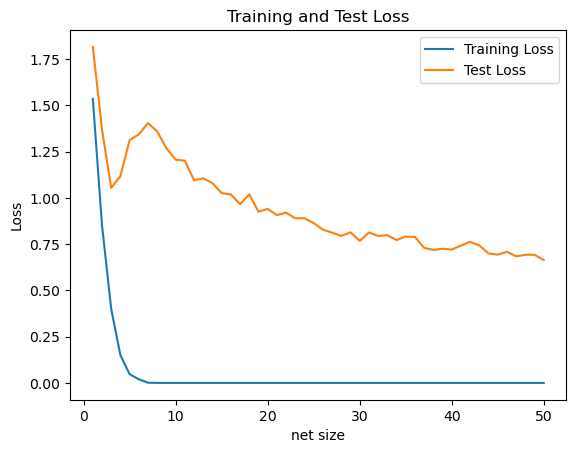

In [ ]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('net size')
plt.ylabel('Loss')
plt.plot(layer_size_list, mean_train_loss_list, label='Training Loss')
plt.plot(layer_size_list, mean_test_loss_list, label='Test Loss')
plt.legend()
plt.show()